In [1]:
import pandas as pd
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [3]:
url = 'https://github.com/datasci-harris/final-project-brand_careaway_sentimental_anlysis/blob/1aa1a65c7014b054815781bd34b5d78dc9a47c54/clean_data/master_table.csv'
data = pd.read_csv(url)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13040 entries, 0 to 13039
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      13040 non-null  int64  
 1   scrapping_date  13040 non-null  object 
 2   reviewer_name   13040 non-null  object 
 3   review_date     13040 non-null  object 
 4   rating          13040 non-null  float64
 5   review_title    9951 non-null   object 
 6   review_content  11719 non-null  object 
 7   date_of_stays   9109 non-null   object 
 8   hotel_name      13040 non-null  object 
 9   source_name     13040 non-null  object 
 10  period          13040 non-null  object 
 11  rating_rescale  13040 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.2+ MB


### Sentiment Analysis

In this section we summarized the sentiment of each client's comments among different hotels.

We plotted the density of polarity and subjectivity.


In [5]:
def get_sentiment(hotel):   
    polarity = []
    subjectivity = []
    a = data[data['hotel_name'] == hotel]
    for index, content in a.iterrows():
        if type(content['review_content']) == type('str'):
            text = content['review_content']
            doc = nlp(text)
            polarity.append(doc._.blob.polarity) # measures the sentiment of each client. 
            subjectivity.append(doc._.blob.subjectivity)  # measures the subjectivity of each client. 
        else:
            pass
    return [polarity,subjectivity]

In [6]:
def plot_polarity(hotel):
    ax = sns.displot(get_sentiment(hotel)[0], kde=True, bins=30)
    plt.title('Distribution of polarity from comments of {}'.format(hotel),fontsize=20)

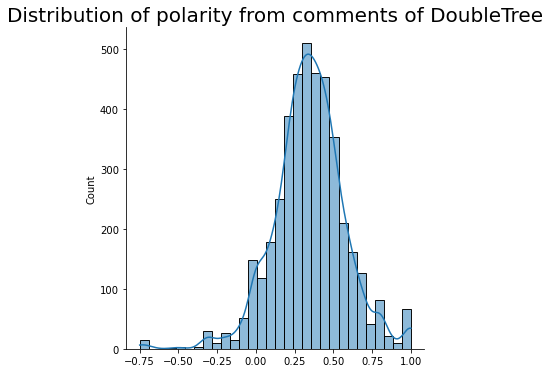

In [7]:
plot_polarity('DoubleTree')

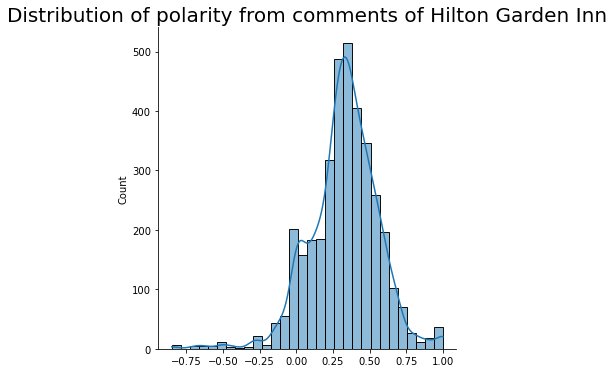

In [8]:
plot_polarity('Hilton Garden Inn')

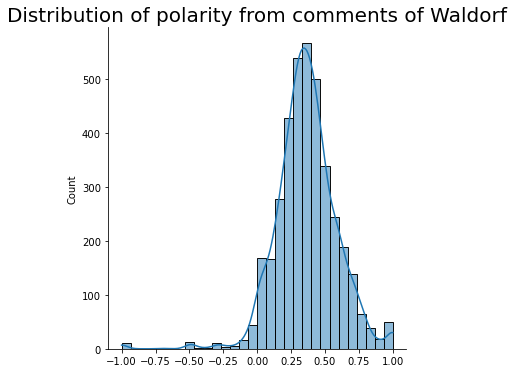

In [9]:
plot_polarity('Waldorf')

In [10]:
def plot_subjectivity(hotel):
    ax = sns.displot(get_sentiment(hotel)[1], kde=True, bins=30)
    plt.title('Distribution of subjectivity from comments of {}'.format(hotel),fontsize=20)

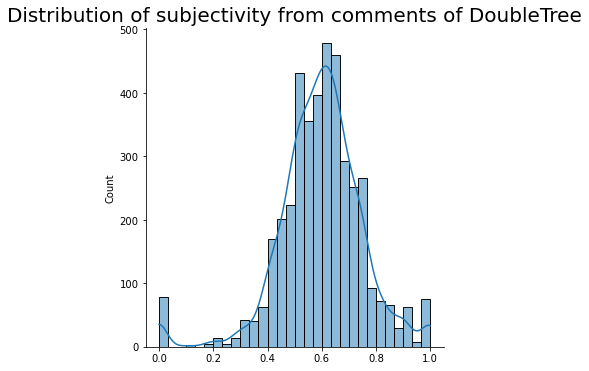

In [11]:
plot_subjectivity('DoubleTree')

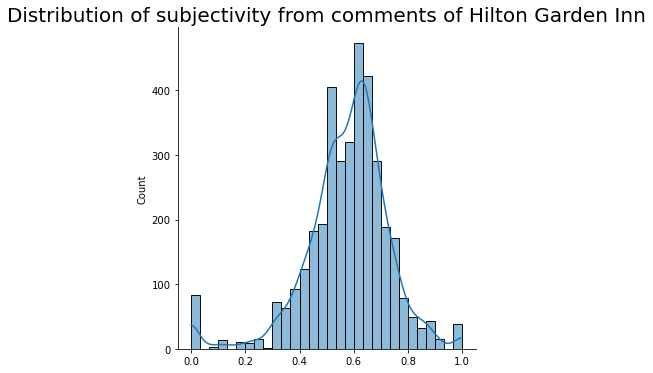

In [12]:
plot_subjectivity('Hilton Garden Inn')

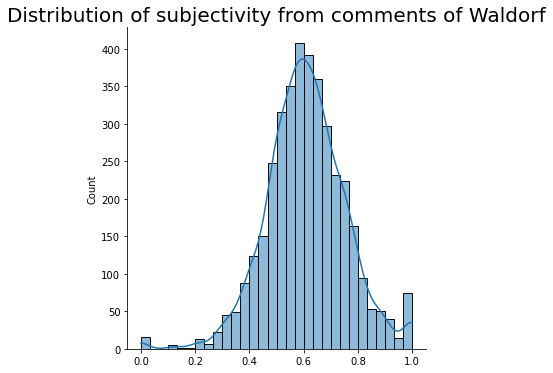

In [13]:
plot_subjectivity('Waldorf')